In [7]:
# 데이터 불러오기
# 저자 캐글 데이터 페이지에서 다운로드 가능(https://www.kaggle.com/airplane2230/apparel-image-dataset-2/discussion/254289)

import pandas as pd

train_df = pd.read_csv('./clothes_data/train.csv')
val_df = pd.read_csv('./clothes_data/val.csv')
test_df = pd.read_csv('./clothes_data/test.csv')

train_df['image'] = train_df['image'].apply(lambda x: str(x).replace('\\', '/'))
val_df['image'] = val_df['image'].apply(lambda x: str(x).replace('\\', '/'))
test_df['image'] = test_df['image'].apply(lambda x: str(x).replace('\\','/'))

train_df.head()

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset/blue_shorts/256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,./clothes_dataset/red_pants/584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset/green_pants/ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,./clothes_dataset/brown_shorts/c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,./clothes_dataset/white_dress/551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [9]:
train_df.image[0]

'./clothes_dataset/blue_shorts/256d854b55ac32ea4d0d6398dffccc4d8909a388.jpg'

# 이미지 제너레이터 정의 및 모델 구성
- 모든 이미지를 메모리에 할당하기엔 무리
- 이미지 제너레이터 활용

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

train_gen = ImageDataGenerator(rescale= 1./255) # 이미지 제너레이터 객체 생성
val_gen = ImageDataGenerator(rescale= 1./255)

def get_steps(num_samples, batch_size): # 모델 학습 시 step 수를 설정하기 위한 함수(스텝 수가 정수가 나오도록)
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size)+1
    else:
        return num_sample // batch_size

model = Sequential()
model.add(Flatten(input_shape=(112,112,3))) # 사용할 데이터가 112*112*3형태임(컬러) > 1차원으로변환
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='sigmoid')) # 시그모이드인이유? 여러개의 라벨을 0/1로 분류하기 때문

model.compile(loss='binary_crossentropy', # 마찬가지 이유로 이진 교차엔트로피를 손실함수로 사용함 
              optimizer='adam', metrics=['acc'])

# 데이터 제네레이터 정의

In [10]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 'dress', 'shirt', 'pants', 'shorts', 'shoes']

train_generator = train_gen.flow_from_dataframe(dataframe=train_df, # 사용할 데이터 프레임
                                               directory=None, # 이미지가 존재하는 폴더(현재 사용하는 데이터는 모든 경로를 포함하므로 None)
                                               x_col='image', # 데이터가 존재하는 컬럼
                                               y_col=class_col, # 라벨이 존재하는 컬럼
                                               target_size=(112,112), # 이미지 크기 조절
                                               color_mode='rgb', # 색상을 나타내는 모드 종류
                                               class_mode='raw', # 다중라벨의 경우 raw, 이진분류이면 binary, 다중분류이면 categorical
                                               batch_size=batch_size, 
                                               shuffle=True,
                                               seed=42)

val_generator = val_gen.flow_from_dataframe(dataframe=val_df, directory=None, x_col = 'image', 
                                            y_col = class_col, target_size = (112, 112), 
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=batch_size, shuffle=True)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


# 모델 학습

In [14]:
model.fit(train_generator,
         steps_per_epoch = get_steps(len(train_df), batch_size),
         validation_data = val_generator,
         validation_steps = get_steps(len(val_df), batch_size),
         epochs = 10)

Epoch 1/10
175/175 [==============================] - 31s 171ms/step - loss: 0.6523 - acc: 0.3575 - val_loss: 0.3443 - val_acc: 0.4998
Epoch 2/10
175/175 [==============================] - 30s 170ms/step - loss: 0.2978 - acc: 0.4842 - val_loss: 0.3218 - val_acc: 0.3384
Epoch 3/10
175/175 [==============================] - 30s 169ms/step - loss: 0.2973 - acc: 0.4918 - val_loss: 0.2897 - val_acc: 0.6073
Epoch 4/10
175/175 [==============================] - 30s 169ms/step - loss: 0.2641 - acc: 0.5151 - val_loss: 0.2869 - val_acc: 0.6608
Epoch 5/10
175/175 [==============================] - 30s 171ms/step - loss: 0.2245 - acc: 0.5590 - val_loss: 0.2643 - val_acc: 0.5784
Epoch 6/10
175/175 [==============================] - 30s 170ms/step - loss: 0.2148 - acc: 0.5635 - val_loss: 0.2299 - val_acc: 0.6102
Epoch 7/10
175/175 [==============================] - 30s 170ms/step - loss: 0.2088 - acc: 0.5726 - val_loss: 0.2497 - val_acc: 0.4860
Epoch 8/10
175/175 [==============================] - 3

# 테스트 데이터를 통해 예측

In [17]:
test_gen = ImageDataGenerator(rescale = 1./255)

# y_col: None, class_mode: None > 라벨은 반환하지 않음
test_generator = test_gen.flow_from_dataframe(
    dataframe=test_df, 
    directory=None,
    x_col = 'image',
    y_col = None,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode=None,
    batch_size=batch_size,
    shuffle = False)

preds = model.predict(test_generator,steps = get_steps(len(test_df), batch_size),verbose = 1)

Found 3416 validated image filenames.
107/107 [==============================] - 13s 118ms/step


# 시각화를 통해 예측 결과 확인

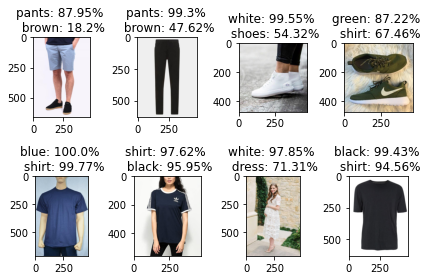

In [18]:
import matplotlib.pyplot as plt
import cv2 # openCV

# 예측 결과 8개만 확인
do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred)) # 각 라벨별 예측확률
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2] # 가장 높은 확률만 2개 가져옴
    
    image = cv2.imread(test_df['image'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # openCV는 BGR이 기본
    
    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')
    
plt.tight_layout()
plt.show()